<ipython-input-8-aeef0fcfd034>:61: RuntimeWarning: overflow encountered in exp
  q = np.exp((Jatual-Jit)/T)


4.999999950907941


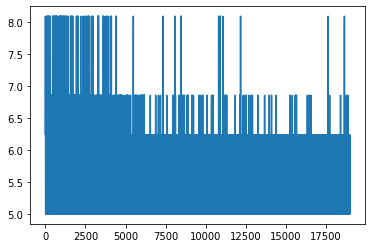

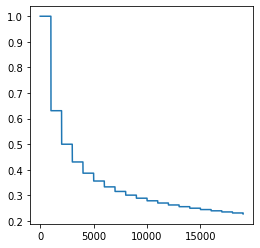

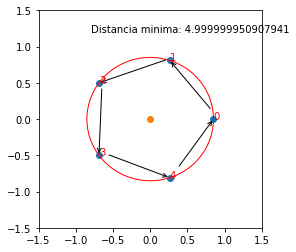

In [8]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Ordem de caminhos inicial aleatoria
cidades = 5
ordem = np.arange(cidades)
np.random.shuffle(ordem[1:])
ordemHat = ordem


# Pentagono com as posicoes de cada cidade
x = []
raioPentagono = 0.8506508
for i in range(0, cidades):
    x.append([raioPentagono*np.cos(i*2*np.pi/cidades), raioPentagono*np.sin(i*2*np.pi/cidades)])

x = np.array(x)

N = 1e3
ordemMin = ordem
Jatual = 1e6
Jmin = Jatual
Js = []
n = 0

T0 = 1
T = T0
Ts = []
Kmax = 20
distancias = []
temperaturas = []
k = 1

# O custo é a distancia total percurrida
def J(ordem):
    distTot = 0
    for i in range(1, cidades):
        dist = np.linalg.norm(x[ordem[i]]-x[ordem[i-1]])
        distTot += dist
        
    dist = np.linalg.norm(x[ordem[i]]-x[ordem[0]])
    distTot += dist
    return distTot


# Simulated Annealing
while k < Kmax:
    n += 1
    
    # Troca duas cidades de ordem de maneira aleatoria, exceto a primeira que é sempre a mesma
    idx = random.randint(1, cidades-1)
    idx2 = random.randint(1, cidades-1)
    ordemHat = ordem.copy()
    ordemHat[idx], ordemHat[idx2] = ordem[idx2], ordem[idx]
            
    Jit = J(ordemHat)
    
    q = np.exp((Jatual-Jit)/T)
    r = random.uniform(0, 1)
    
    if r < q:
        ordem = ordemHat.copy()
        Jatual = Jit
        
    if Jit < Jmin:
        Jmin = Jit
        ordemMin = ordemHat.copy()   
             
    if n % N == 0:
        k += 1
#         print(k/Kmax*100)
        T = T0/(np.log2(1 + k))

    distancias.append(Jit)
    temperaturas.append(T)

# Visualização do resultado final

plt.plot(distancias)
plt.subplots(figsize=(4, 4))
plt.plot(temperaturas)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[:,0], x[:,1])
ax.scatter(0, 0)
ax.add_patch(plt.Circle((0, 0), raioPentagono, color='r', fill=False))
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

print(J(ordemMin))
for i in range(0, cidades):
    plt.annotate(text=str(ordemMin[i-1]), xy=(x[ordemMin[i]]), xytext=(x[ordemMin[i-1]]), color='r', arrowprops=dict(arrowstyle='->'))

plt.annotate(text="Distancia minima: " + str(Jmin), xy=(-0.8,1.2), xytext=(-0.8,1.2))

plt.show()

In [11]:
x

array([[ 0.8506508 ,  0.        ],
       [ 0.26286555,  0.80901699],
       [-0.68819095,  0.5       ],
       [-0.68819095, -0.5       ],
       [ 0.26286555, -0.80901699]])

In [7]:
x[0]

array([0.8506508, 0.       ])